In [ ]:
import numpy as np
from sklearn.datasets import make_moons ,make_circles
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , mean_squared_error
import matplotlib.pyplot as plt
import matplotlib.colors
import pandas as pd
from tqdm import tqdm_notebook

In [ ]:
class gen_FFNN():
  def __init__(self,n_inputs,hidden_sizes = [2]):
    self.nx = n_inputs
    self.ny = 1
    self.nh = len(hidden_sizes)
    #print("__init__ => self.nh :",self.nh)
    self.sizes = [self.nx] + hidden_sizes + [self.ny]
    #print("__init__ => self.sizes :",self.sizes)

    self.W = {}
    self.B = {}
    for i in range(self.nh +1):
      self.W[i+1] = np.random.randn(self.sizes[i],self.sizes[i+1])
      #print("__init__ => self.W[{} + 1] is {}".format(i,self.W[i+1]))
      self.B[i+1] = np.zeros((1,self.sizes[i+1]))
      #print("__init__ => self.B[{} + 1] is {}".format(i,self.B[i+1]))

  def sigmoid(self,x):
    return 1.0/(1.0 + np.exp(-x))

  def forward_pass(self, x):
    self.A = {}
    self.H = {}
    self.H[0] = x.reshape(1, -1)
    for i in range(self.nh+1):
      self.A[i+1] = np.matmul(self.H[i], self.W[i+1]) + self.B[i+1]
      self.H[i+1] = self.sigmoid(self.A[i+1])
    return self.H[self.nh+1]

  def grad_sigmoid(self, x):
    return x*(1-x) 
  
  def grad(self, x, y):
    self.forward_pass(x)
    self.dW = {}
    self.dB = {}
    self.dH = {}
    self.dA = {}
    L = self.nh + 1
    self.dA[L] = (self.H[L] - y)
    for k in range(L, 0, -1):
      self.dW[k] = np.matmul(self.H[k-1].T, self.dA[k])
      self.dB[k] = self.dA[k]
      self.dH[k-1] = np.matmul(self.dA[k], self.W[k].T)
      self.dA[k-1] = np.multiply(self.dH[k-1], self.grad_sigmoid(self.H[k-1]))

  def fit(self, X ,Y ,epochs=1, learning_rate = 1,initialise = True,display_loss = True):

    if initialise:
      for i in range(self.nh +1 ):
        self.W[i+1] = np.random.randn(self.sizes[i],self.sizes[i+1])
        self.B[i+1] = np.zeros((1, self.sizes[i+1]))

    if display_loss :
      loss = {}
      
    for e in tqdm_notebook(range(epochs),total = epochs ,unit = "epoch"):
      dW = {}
      dB = {}
      for i in range(self.nh+1):
        dW[i+1] = np.zeros((self.sizes[i], self.sizes[i+1]))
        dB[i+1] = np.zeros((1, self.sizes[i+1]))
      for x, y in zip(X, Y):
        self.grad(x, y)
        for i in range(self.nh+1):
          dW[i+1] += self.dW[i+1]
          dB[i+1] += self.dB[i+1]
      m = X.shape[1]
      for i in range(self.nh+1):
        self.W[i+1] -= learning_rate * dW[i+1] / m
        self.B[i+1] -= learning_rate * dB[i+1] / m
      if display_loss:
        Y_pred = self.predict(X)
        loss[e] = mean_squared_error(Y_pred, Y)

    if display_loss:
      plt.plot(np.array(list(loss.values())).astype(float))
      plt.xlabel('Epochs')
      plt.ylabel('Mean Squared Error')
      plt.show()

  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(y_pred)
    return np.array(Y_pred).squeeze()
      

In [ ]:
data , labels = make_moons(n_samples=1000 ,noise = 0.15,random_state=0)
#print(labels)

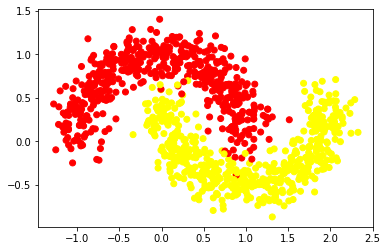

In [ ]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list(" ",["red","yellow"])
plt.scatter(data[:,0],data[:,1],c = labels,cmap = my_cmap)
plt.show()

In [ ]:
X_train , X_val ,Y_train,Y_val = train_test_split(data,labels,stratify = labels,random_state=0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


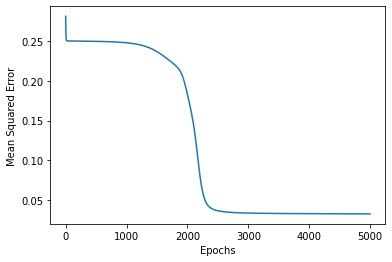

In [ ]:
gen = gen_FFNN(2,[5,3,1])
gen.fit(X_train, Y_train, epochs=5000, learning_rate=.001, display_loss=True)

In [ ]:
Y_pred_train =gen.predict(X_train)
Y_pred_binarised_train = (Y_pred_train >= 0.5).astype("int").ravel()
Y_pred_val = gen.predict(X_val)
Y_pred_binarised_val = (Y_pred_val >= 0.5).astype("int").ravel()
accuracy_train = accuracy_score(Y_pred_binarised_train, Y_train)
accuracy_val = accuracy_score(Y_pred_binarised_val, Y_val)

print("Training accuracy", round(accuracy_train, 2))
print("Validation accuracy", round(accuracy_val, 2))

Training accuracy 0.96
Validation accuracy 0.95


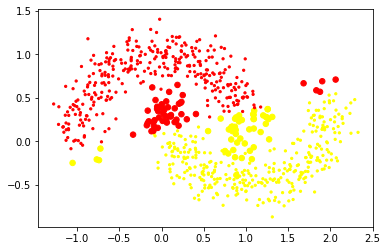

In [ ]:
plt.scatter(X_train[:,0], X_train[:,1], c=Y_pred_binarised_train, cmap=my_cmap, s=25*(np.abs(Y_pred_binarised_train-Y_train)+.2))
plt.show()

In [ ]:
data1, labels1 = make_circles(n_samples=1000,random_state=0,noise = 0.2,factor=0.3)
#print(labels)

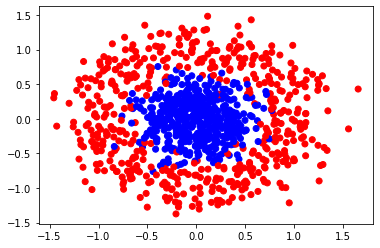

In [ ]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list(" ",["red","blue"])
plt.scatter(data1[:,0],data1[:,1],c = labels1,cmap = my_cmap)
plt.show()

In [ ]:
X_train1 , X_val1 ,Y_train1,Y_val1 = train_test_split(data1,labels1,stratify = labels,random_state=0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:57: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


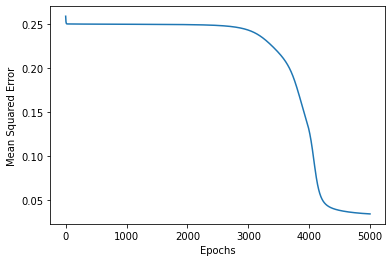

In [ ]:
gen_1 = gen_FFNN(2,[5,3,2,])
gen_1.fit(X_train1, Y_train1, epochs=5000, learning_rate=.001, display_loss=True)

In [ ]:
Y_pred1 = gen_1.predict(X_train)
Y_pred_binarised_train1 = (Y_pred1 >= 0.5).astype("int").ravel()
Y_pred_val1 = gen_1.predict(X_val)
Y_pred_binarised_val1 = (Y_pred_val1 >= 0.5).astype("int").ravel()
accuracy_train1 = accuracy_score(Y_pred_binarised_train1, Y_train1)
accuracy_val1 = accuracy_score(Y_pred_binarised_val1, Y_val1)
print("Training accuracy", (round(accuracy_train1, 2))*100)
print("Validation accuracy", (round(accuracy_val1, 2))*100)


Training accuracy 95.0
Validation accuracy 95.0


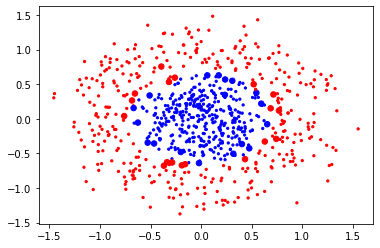

In [ ]:
plt.scatter(X_train1[:,0], X_train1[:,1], c=Y_pred_binarised_train1, cmap=my_cmap, s=25*(np.abs(Y_pred_binarised_train1-Y_train1)+.2))
plt.show()